In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
from tqdm.auto import tqdm

from bounded_rand_walkers.cpp.boundaries import bound_map, get_max_step
from bounded_rand_walkers.shaper_generation import (
    adaptive_simpsons,
    rotation,
    shaper_map,
)

mpl.rc_file("matplotlibrc")

In [2]:
bound_name = "square"
assert bound_name in bound_map
assert bound_name in shaper_map

shaper_xy_func = shaper_map[bound_name]["x_y_function"]

max_step = get_max_step(bound_name)
print(f"Max step: {max_step:0.10f}")


def get_integrand(r):
    def to_int(theta):
        return shaper_xy_func(*rotation(r, 0, theta))

    return to_int


Max step: 1.4142135624


In [3]:
results = {}
radii = np.linspace(max_step - 1e-4, max_step, 20)

In [4]:
%%time
results["quad"] = []
for r in radii:
    to_int = get_integrand(r)
    results["quad"].append(quad(to_int, 0, 2 * np.pi)[0])

CPU times: user 8.79 ms, sys: 196 µs, total: 8.99 ms
Wall time: 10.2 ms


In [5]:
%%time
results["custom"] = []
for r in tqdm(radii):
    to_int = get_integrand(r)
    results["custom"].append(
        adaptive_simpsons(to_int, 0, 2 * np.pi, n_start=1000, vec_func=True)
    )


CPU times: user 43.8 ms, sys: 0 ns, total: 43.8 ms
Wall time: 52.7 ms


In [6]:
%%time
results["midpoint"] = []
for r in tqdm(radii):
    to_int = get_integrand(r)
    results["midpoint"].append(np.mean(to_int(np.linspace(0, 2 * np.pi, 1000))))


CPU times: user 28.4 ms, sys: 0 ns, total: 28.4 ms
Wall time: 38.5 ms


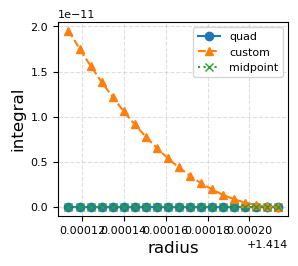

In [7]:
for ((method, vals), marker, ls) in zip(
    results.items(), ["o", "^", "x", "|"], ["-", "--", ":", "-."]
):
    plt.plot(radii, vals, label=method, marker=marker, ls=ls)
plt.xlabel("radius")
plt.ylabel("integral")
_ = plt.legend()